In [1]:
# Importan Lib
import pandas as pd

# Libraries for Visualization
import plotly.express as px
import matplotlib.pyplot as plt 
# data viz lib
import seaborn as sns 
# data viz lib
import numpy as np 
# numneric calculation

# Library for splitting the data in Train and Test
from sklearn.model_selection import train_test_split

# Library required for the Linear Regression Algorithm
from sklearn.linear_model import LinearRegression

# Library for the metric required to evaluate the model
from sklearn.metrics import mean_absolute_error

%matplotlib inline 
# allow to plot the charts inline

In [5]:
import os
os.getcwd()

'C:\\Users\\Animesh.Parikshya\\Documents\\IIM Classes\\Python\\JLC\\Data sets'

In [6]:
data_dir='C:/Users/Animesh.Parikshya/Documents/IIM Classes/Data sets'

In [8]:
df = pd.read_csv('house sales.csv')

In [9]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [11]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [12]:
# observe what is in data
# Categoical 
df.waterfront.unique()

array([0, 1], dtype=int64)

In [13]:
df.waterfront.nunique()

2

In [14]:
df.floors.unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [15]:
df.sqft_living.unique() # no value

array([1180, 2570,  770, ..., 3087, 3118, 1425], dtype=int64)

In [16]:
df.view.unique()

array([0, 3, 4, 2, 1], dtype=int64)

In [17]:
df.shape

(21613, 21)

In [18]:
df.floors.value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [19]:
df.waterfront.value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [20]:
# EDA and Viz
# after observinfg the data , there are two mean of EDA
# 1. Univariate :- Analysis of 1 variable at a time 
# 2. Bivariate :- Analysis of 2 variable together (Relationship b/w 2 vairiable(x,y) - how your X variable impact th y var)
## Y - Dependent var or target var: 1 and only 1 variab;e in the context of business prospective
## X - Independent Var : list of other var
### we try to find out y = f(x)
# 3. Multivariate:- more than 2

# In Univariate Depends on the data type of the var
# There are typicaly 2 Data type: 
##              |                 Math                    |   VIZ
## Continous    | Mean, min, max, std, median , summary   | HISTOGRAM, Boxplot
## Categorical  | frequecy Count                          | Bar graph, pie chart, Stacked bar

TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

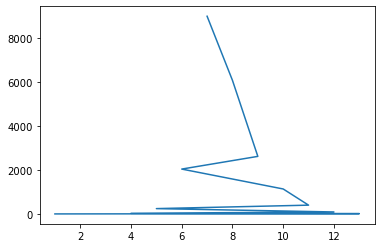

In [21]:
df.grade.value_counts().plot().bar()

Text(0, 0.5, '%')

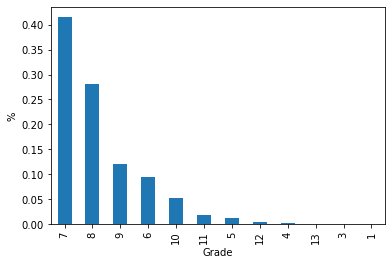

In [23]:
(df.grade.value_counts()/df.shape[0]).plot.bar()
plt.xlabel("Grade")
plt.ylabel("%")

Text(0, 0.5, '%')

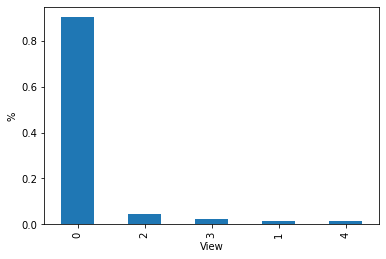

In [24]:
(df.view.value_counts()/df.shape[0]).plot.bar()
plt.xlabel("View")
plt.ylabel("%")

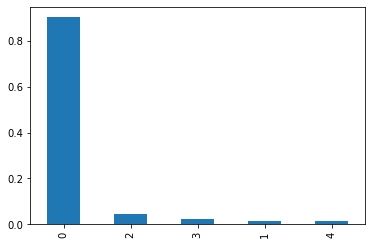

In [25]:
(df.view.value_counts()/df.shape[0]).plot.bar()

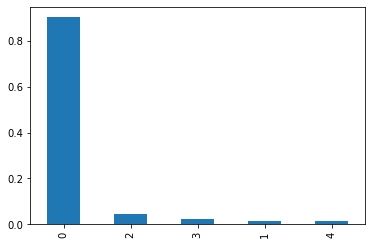

In [26]:
df.view.value_counts(normalize= True ).plot.bar()

# Univaiate for continous var

In [19]:
df_train = df.copy()

In [22]:
# using .describe

df_train.price.describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [23]:
df_train.price.describe().map(lambda x: format(x, 'f'))
# or for 2 decimal places


count      21613.000000
mean      540088.141767
std       367127.196483
min        75000.000000
25%       321950.000000
50%       450000.000000
75%       645000.000000
max      7700000.000000
Name: price, dtype: object

In [24]:
df_train.price.describe().map(lambda x: format(x, '0.2f'))

count      21613.00
mean      540088.14
std       367127.20
min        75000.00
25%       321950.00
50%       450000.00
75%       645000.00
max      7700000.00
Name: price, dtype: object

In [25]:
help('FORMATTING') # get documentation for formatting options

Format String Syntax
********************

The "str.format()" method and the "Formatter" class share the same
syntax for format strings (although in the case of "Formatter",
subclasses can define their own format string syntax).  The syntax is
related to that of formatted string literals, but there are
differences.

Format strings contain “replacement fields” surrounded by curly braces
"{}". Anything that is not contained in braces is considered literal
text, which is copied unchanged to the output.  If you need to include
a brace character in the literal text, it can be escaped by doubling:
"{{" and "}}".

The grammar for a replacement field is as follows:

      replacement_field ::= "{" [field_name] ["!" conversion] [":" format_spec] "}"
      field_name        ::= arg_name ("." attribute_name | "[" element_index "]")*
      arg_name          ::= [identifier | digit+]
      attribute_name    ::= identifier
      element_index     ::= digit+ | index_string
      index_string      ::=

In [26]:
df_train.sqft_living.describe()

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

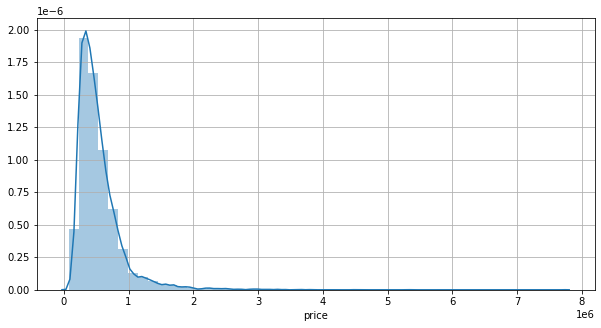

In [38]:
# Histogram of price
plt.figure(figsize=(10,5))
plt.grid()
#plt.text(x = df_train.price, color='white')
sns.distplot(df_train.price) #blue line - KDE - Kernel density estimate

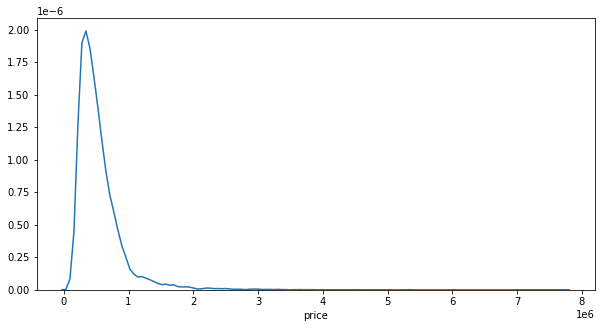

In [39]:
# Histogram of price
plt.figure(figsize=(10,5))
sns.distplot(df_train.price, hist= False) #blue line - KDE - Kernel density estimate

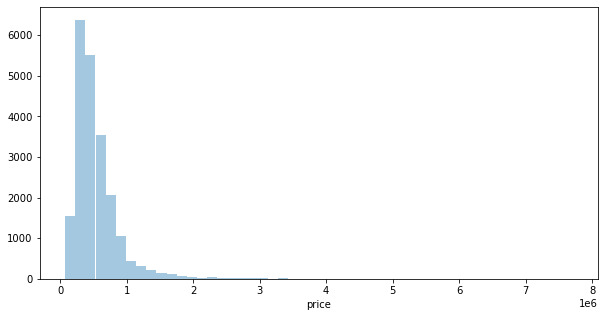

In [25]:
# Histogram of price
plt.figure(figsize=(10,5))

sns.distplot(df_train.price, kde= False) #blue line - KDE - Kernel density estimate

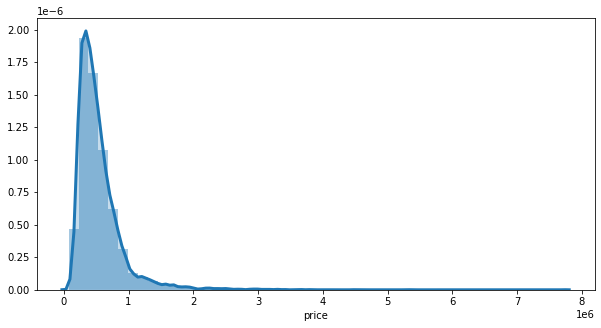

In [41]:
plt.figure(figsize=(10,5))
sns.distplot(df_train.price, hist = True, kde_kws={'linewidth' : 3, 'shade' : True})

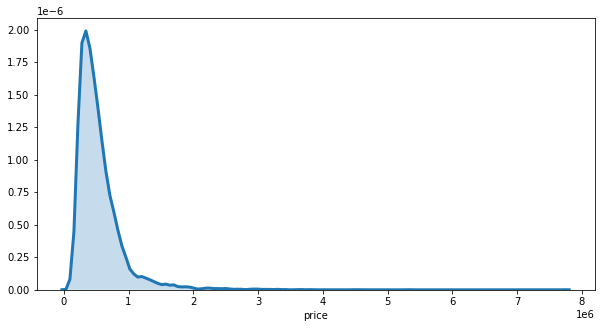

In [42]:
plt.figure(figsize=(10,5))
sns.distplot(df_train.price, hist = False, kde_kws={'linewidth' : 3, 'shade' : True})

(array([1.15419302e-06, 1.30340498e-07, 1.91748591e-08, 5.46119404e-09,
        1.57767828e-09, 2.42719735e-10, 2.42719735e-10, 6.06799338e-11,
        6.06799338e-11, 1.21359868e-10]),
 array([  75000.,  837500., 1600000., 2362500., 3125000., 3887500.,
        4650000., 5412500., 6175000., 6937500., 7700000.]),
 <a list of 10 Patch objects>)

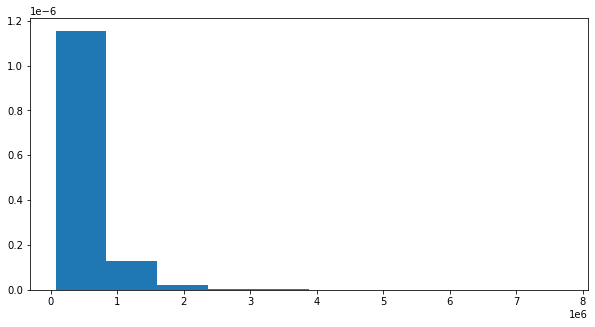

In [49]:
plt.figure(figsize=(10,5))
plt.hist(df_train.price, density= True, )

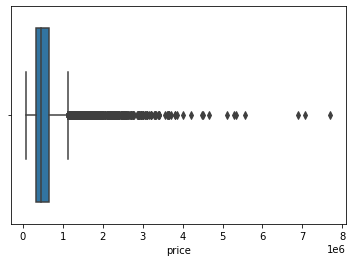

In [50]:
# Box plot of price
sns.boxplot(df_train.price)

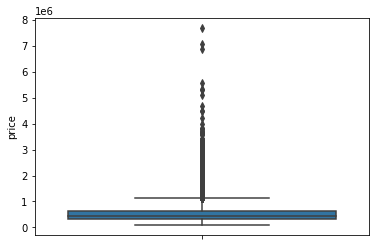

In [51]:
# Box plot of price
sns.boxplot(y = df_train.price)

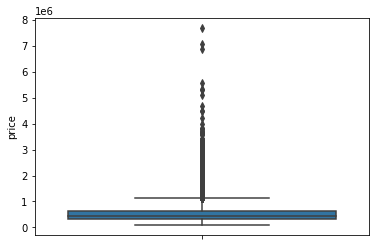

In [52]:
# Box plot of price
sns.boxplot(df_train.price, orient= 'v')

# Bivariate analysis

In [53]:
# Numeric Numeric comb ( y and x)

# Correlation
# -1 =  Perfect negetive correllation (when x increases Y decreses)
# 0 = Zero
# 1 = Perfect Positive cor (when x increase y increases)
# 0.7>= - Good Correlatrion 
# 0.5 - 0.7 = Decent Correlation 
# < 0.5 = worst correlation
df_train.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [55]:
# Vizually appealing corr matrix
cor1 = df_train.corr()

In [56]:
cor1.style.background_gradient(cmap = 'coolwarm')
#cor1.style.background_gradient(cmap = 'viridis')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


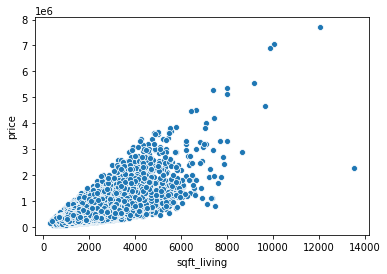

In [57]:
# Bivariate plot for N-N (Y and X) - Scatter plot
sns.scatterplot(df_train.sqft_living, df_train.price)

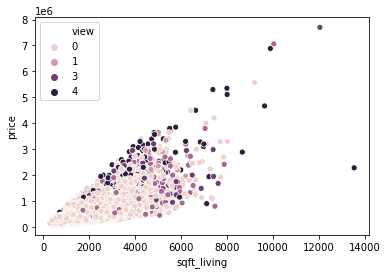

In [60]:
# Bivariate plot for N-N (Y and X) - Scatter plot
sns.scatterplot(df_train.sqft_living, df_train.price, hue = df_train.view)

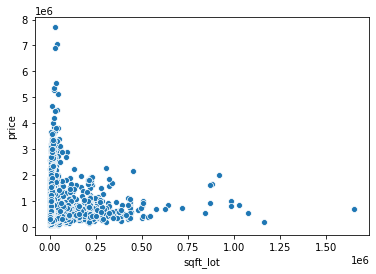

In [61]:
sns.scatterplot(df_train.sqft_lot, df_train.price)

In [ ]:
# Cat and Cat combinations (y and x) - price_bkt vs view/ waterfront

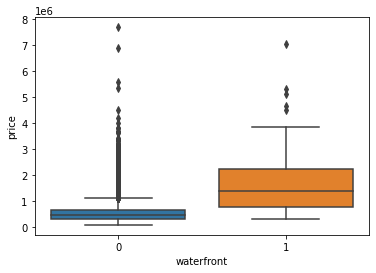

In [64]:
# Box plots for bivariate analysis

sns.boxplot(df_train.waterfront, df_train.price)
# 1st - check the median is sam eor not 
#2nd - checkoverlap - no overlap 

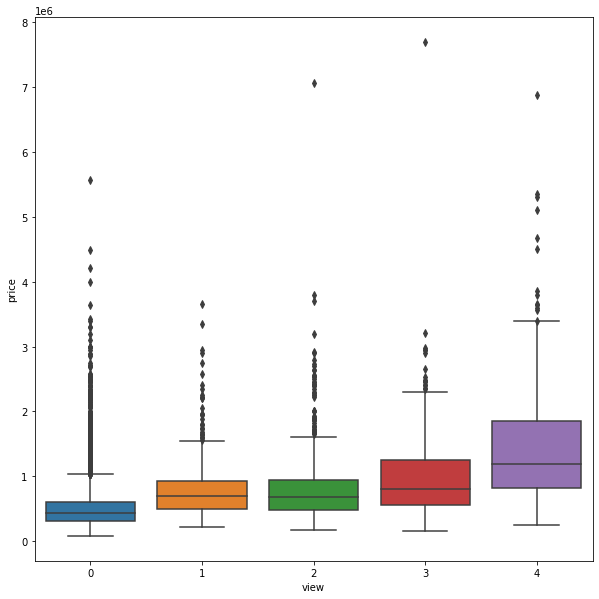

In [65]:
plt.figure(figsize= (10,10))
sns.boxplot(df_train.view, df_train.price)

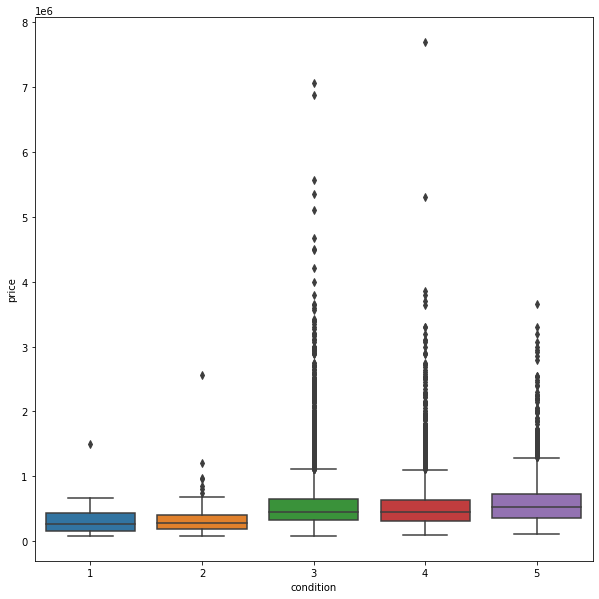

In [66]:
plt.figure(figsize= (10,10))
sns.boxplot(df_train.condition, df_train.price)

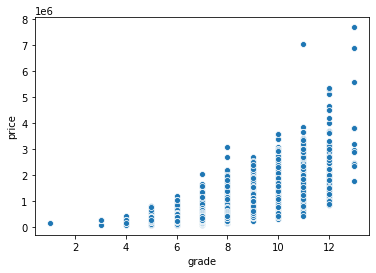

In [60]:
sns.scatterplot(df_train.grade, df_train.price)

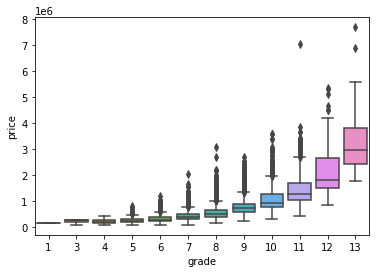

In [61]:
sns.boxplot(df_train.grade, df_train.price)

In [ ]:
# Cat and Cat combinations (y and x) - price_bkt vs view/ waterfront

In [62]:
# S1 - convert my price into price buckets
df_train.price.describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [63]:
df_train.loc[df_train.price <= df_train.price.quantile(0.25), 'Price_Bkt']  = "LowPrice"
df_train.loc[df_train.price >= df_train.price.quantile(0.75), 'Price_Bkt']  = "HighPrice"
df_train.loc[(df_train.price > df_train.price.quantile(0.25)) &
             (df_train.price < df_train.price.quantile(0.75)), 'Price_Bkt']  = "MedPrice"

In [64]:
df_train.Price_Bkt.value_counts()

MedPrice     10796
HighPrice     5413
LowPrice      5404
Name: Price_Bkt, dtype: int64

In [65]:
pd.crosstab(df_train.Price_Bkt, df_train.waterfront)

waterfront,0,1
Price_Bkt,,
HighPrice,5278,135
LowPrice,5402,2
MedPrice,10770,26


In [66]:
pd.crosstab(df_train.waterfront, df_train.Price_Bkt)

Price_Bkt,HighPrice,LowPrice,MedPrice
waterfront,,,
0,5278,5402,10770
1,135,2,26


In [67]:
pd.crosstab(df_train.waterfront, df_train.Price_Bkt)/ df_train.shape[0]

Price_Bkt,HighPrice,LowPrice,MedPrice
waterfront,,,
0,0.244205,0.249942,0.498311
1,0.006246,0.000093,0.001203


In [68]:
pd.crosstab(df_train.waterfront, df_train.Price_Bkt, normalize= True)

Price_Bkt,HighPrice,LowPrice,MedPrice
waterfront,,,
0,0.244205,0.249942,0.498311
1,0.006246,0.000093,0.001203


In [69]:
# Row wise normalization
pd.crosstab(df_train.waterfront, df_train.Price_Bkt, normalize= 'index')

Price_Bkt,HighPrice,LowPrice,MedPrice
waterfront,,,
0,0.246061,0.251841,0.502098
1,0.828221,0.012270,0.159509


In [70]:
# Col wise normalization
pd.crosstab(df_train.waterfront, df_train.Price_Bkt, normalize= 'columns')

Price_Bkt,HighPrice,LowPrice,MedPrice
waterfront,,,
0,0.97506,0.99963,0.997592
1,0.02494,0.00037,0.002408


In [71]:
# Margins
# Row wise normalization
pd.crosstab(df_train.waterfront, df_train.Price_Bkt, margins= True)

Price_Bkt,HighPrice,LowPrice,MedPrice,All
waterfront,,,,
0,5278,5402,10770,21450
1,135,2,26,163
All,5413,5404,10796,21613


In [72]:
 pd.crosstab(df_train.waterfront, df_train.Price_Bkt, normalize= 'columns',margins= True)

Price_Bkt,HighPrice,LowPrice,MedPrice,All
waterfront,,,,
0,0.97506,0.99963,0.997592,0.992458
1,0.02494,0.00037,0.002408,0.007542


In [73]:
 pd.crosstab(df_train.waterfront, df_train.Price_Bkt, normalize= 'index',margins= True)

Price_Bkt,HighPrice,LowPrice,MedPrice
waterfront,,,
0,0.246061,0.251841,0.502098
1,0.828221,0.012270,0.159509
All,0.250451,0.250035,0.499514


In [74]:
# Cross tab for agrregations
# Aggreagte for average price across waterfront

pd.crosstab(index = df_train.waterfront, columns= 'avPrice', values= df_train.price , aggfunc= 'mean')

col_0,avPrice
waterfront,
0,5.315636e+05
1,1.661876e+06


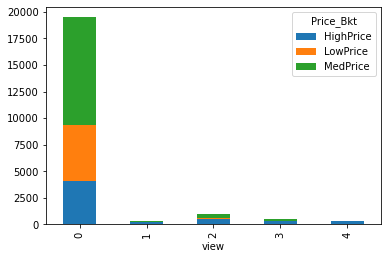

In [75]:
# Stacked bar plot for Cat - Cat combination
temp = pd.crosstab(df_train.view, df_train.Price_Bkt)
temp.plot(kind = 'bar', stacked = True)

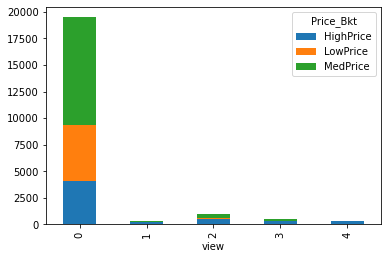

In [77]:
temp = pd.crosstab(df_train.view, df_train.Price_Bkt)
temp.plot.bar(stacked = True)

In [76]:
temp

Price_Bkt,HighPrice,LowPrice,MedPrice
view,,,
0,4079,5299,10111
1,192,17,123
2,521,71,371
3,341,15,154
4,280,2,37


<Figure size 720x720 with 0 Axes>

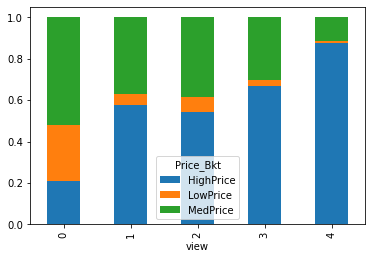

In [78]:
# Row wise normalization
plt.figure(figsize=(10,10))
pd.crosstab(df_train.view, df_train.Price_Bkt, normalize= 'index').plot.bar(stacked = True)

In [79]:
# Multivariate analysis
# Cat - Cat

pd.crosstab(index = df_train.waterfront, columns= df_train.view, values= df_train.price , aggfunc= 'mean')

view,0,1,2,3,4
waterfront,,,,,
0,496564.192108,812816.429003,7.836095e+05,9.642053e+05,1.270030e+06
1,NaN,635000.000000,1.841875e+06,1.172500e+06,1.727691e+06


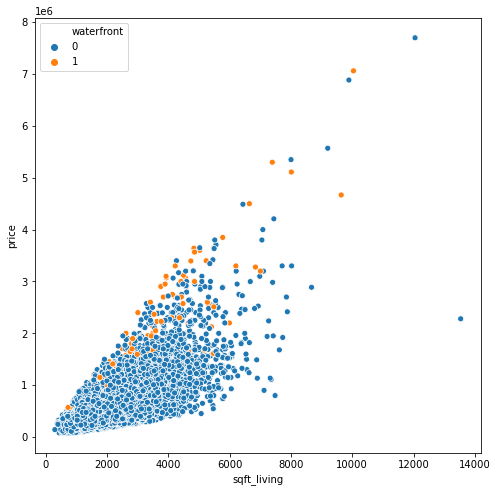

In [80]:
# Numeric-Numeric  multivariate
plt.figure(figsize= (8,8))
sns.scatterplot(df_train.sqft_living, df_train.price, hue = df_train.waterfront)

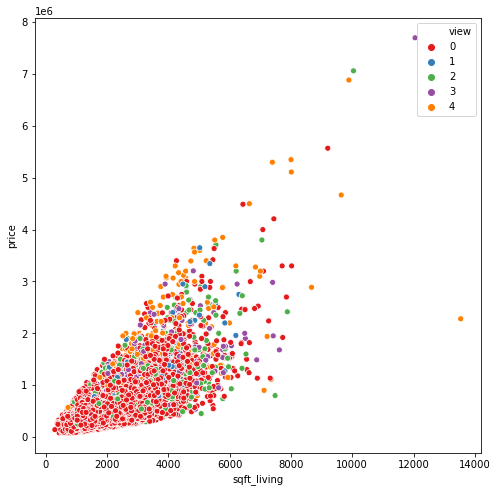

In [81]:
# Numeric-Numeric  multivariate
plt.figure(figsize= (8,8))
sns.scatterplot(df_train.sqft_living, df_train.price, hue = df_train.view, palette= sns.color_palette("Set1", n_colors = 5))

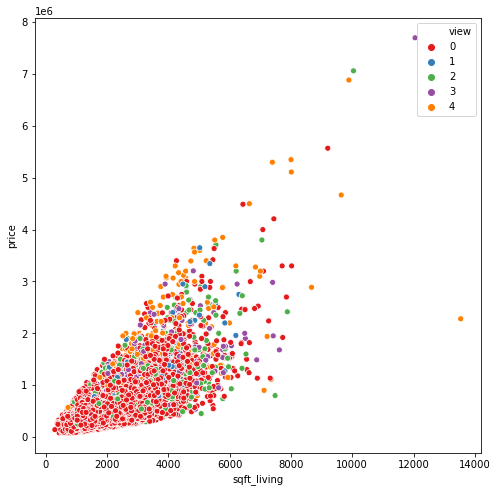

In [82]:
# Numeric-Numeric  multivariate
plt.figure(figsize= (8,8))
sns.scatterplot(df_train.sqft_living, df_train.price, hue = df_train.view, 
                palette= sns.color_palette("Set1", n_colors = df_train.view.nunique()))

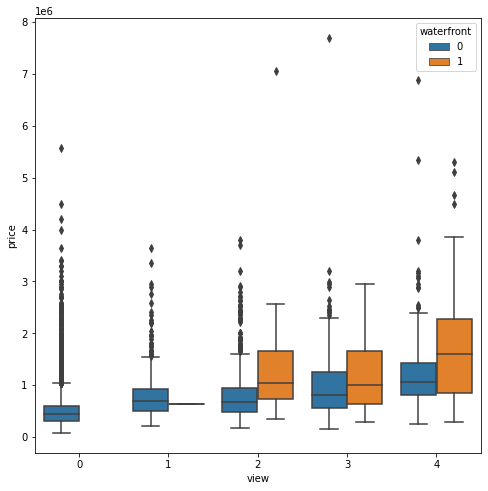

In [83]:
plt.figure(figsize= (8,8))
sns.boxplot(df_train.view, df_train.price, hue = df_train.waterfront)

In [84]:
# dummy variable
df_Price_dummies = pd.get_dummies(df_train.Price_Bkt)

In [85]:
df_Price_dummies.head()

,HighPrice,LowPrice,MedPrice
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [86]:
df_train_new = pd.concat([df_train, df_Price_dummies], axis = 1)
df_train_new.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Price_Bkt,HighPrice,LowPrice,MedPrice
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,LowPrice,0,1,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,MedPrice,0,0,1
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,LowPrice,0,1,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,MedPrice,0,0,1
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,MedPrice,0,0,1
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,0,98053,47.6561,-122.005,4760,101930,HighPrice,1,0,0
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,0,98003,47.3097,-122.327,2238,6819,LowPrice,0,1,0
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,0,98198,47.4095,-122.315,1650,9711,LowPrice,0,1,0
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,0,98146,47.5123,-122.337,1780,8113,LowPrice,0,1,0
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,0,98038,47.3684,-122.031,2390,7570,MedPrice,0,0,1


In [87]:
# Creating dummies for all categorical variables in one go
# Note we are dropping date column from df_train because it is also a categorical column (we have not treated it yet).
# If we dont drop date col now, it will create many many dummy columns for each distinct date

df_Price_dummies1 = pd.get_dummies(df_train.drop(['date'], axis = 1))

# general syntax
# df_new = pd.get_dummies(df_old)

In [88]:
df_Price_dummies1.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Price_Bkt_HighPrice,Price_Bkt_LowPrice,Price_Bkt_MedPrice
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,0,1,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,0,0,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,0,1,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,0,0,1
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,0,0,1


In [89]:
# Outlier detection and treatment
# 1.
# Data is Normally ditributed
# Detection can be done thru Z score = ABS [(X-mean)/ sd]
# If Z SCORE IS > 3 --- > outlier

df_train.price.describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [94]:
std_price = np.std(df_train.price)
mean_price = np.mean(df_train.price)

df_train['Z_value'] = (df_train.price-mean_price)/std_price

df_train_out = df_train[(df_train.Z_value > 3) | (df_train.Z_value < -3)]

print(std_price, mean_price)
print((df_train_out).shape[0])

367118.7031813722 540088.1417665294
406


In [95]:
df_train['Z_value'].head()

0   -0.866717
1   -0.005688
2   -0.980849
3    0.174090
4   -0.081958
Name: Z_value, dtype: float64

In [96]:
df_train_out.shape

(406, 23)

In [97]:
df_train_out.price.describe()

count    4.060000e+02
mean     2.276499e+06
std      7.685827e+05
min      1.646000e+06
25%      1.791212e+06
50%      2.000000e+06
75%      2.496250e+06
max      7.700000e+06
Name: price, dtype: float64

In [98]:
406/df_train.shape[0]

0.018784990514967844

In [ ]:
# # Outlier detection and treatment
# 2.
# Data is may or may not Normally ditributed
# Detection can be done thru Box plots = x < q1-1.5iqr  or x > q3+1.5iqr ---> outliers

In [101]:
Q1 = df_train.price.quantile(0.25)
Q3 = df_train.price.quantile(0.75)

IQR = Q3-Q1
print(Q1, Q3, IQR)
# Expected max and min values for price
upper_wisk = Q3+1.5*IQR
lower_wisk = Q1-1.5*IQR
print(lower_wisk, upper_wisk)

321950.0 645000.0 323050.0
-162625.0 1129575.0


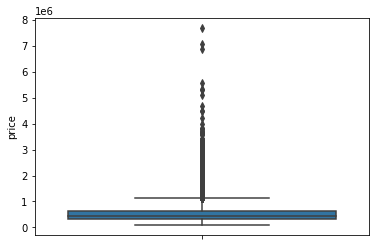

In [102]:
sns.boxplot(df_train.price, orient = 'v')

In [103]:
# Total upper side outliers
df_train[df_train.price > upper_wisk].shape[0]

1146

In [104]:
1146/df_train.shape[0]

0.053023643177717114

In [105]:
# Outlier treatment
# Flag for outliers as per box plot

df_train['Out_Flag'] = df_train['price'].map(lambda x: "Out" if x > 1129575 else "Non-Out")

In [106]:
df_train['Out_Flag'].value_counts()

Non-Out    20467
Out         1146
Name: Out_Flag, dtype: int64

In [107]:
def out_flag (x):
    if x > 1129575:
        return "Out"
    else:
        return "Non-Out"

In [109]:
df_train['Out_Flag1'] = df_train['price'].map(out_flag)

In [112]:
df_train.head(6)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Price_Bkt,Z_value,Out_Flag,Out_Flag1
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,LowPrice,-0.866717,Non-Out,Non-Out
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,MedPrice,-0.005688,Non-Out,Non-Out
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,LowPrice,-0.980849,Non-Out,Non-Out
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,MedPrice,0.174090,Non-Out,Non-Out
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,MedPrice,-0.081958,Non-Out,Non-Out
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,0,98053,47.6561,-122.005,4760,101930,HighPrice,1.865641,Out,Out


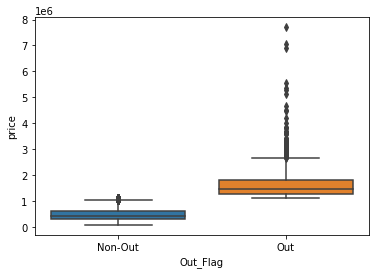

In [113]:
# Box plot by group
sns.boxplot(df_train.Out_Flag, df_train.price, orient= 'v')

In [114]:
pd.crosstab(df_train.Out_Flag, df_train.waterfront, normalize = 'columns')

waterfront,0,1
Out_Flag,,
Non-Out,0.951329,0.374233
Out,0.048671,0.625767


In [115]:
pd.crosstab(df_train.Out_Flag, df_train.view, normalize = 'columns')

view,0,1,2,3,4
Out_Flag,,,,,
Non-Out,0.968957,0.831325,0.841121,0.686275,0.460815
Out,0.031043,0.168675,0.158879,0.313725,0.539185


In [116]:
pd.crosstab(df_train.Out_Flag, df_train.condition, normalize = 'columns')

condition,1,2,3,4,5
Out_Flag,,,,,
Non-Out,0.966667,0.988372,0.946761,0.954922,0.917695
Out,0.033333,0.011628,0.053239,0.045078,0.082305


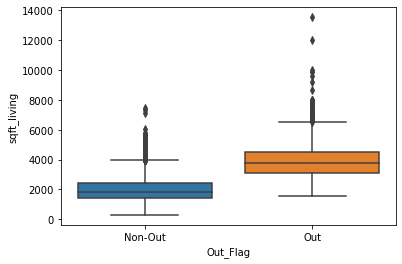

In [117]:
# Box plot by group
sns.boxplot(df_train.Out_Flag, df_train.sqft_living, orient= 'v')

In [118]:
# Just in case you have to treat outliers by floor and cap - 1% and 99% caps
floor = df_train.price.quantile(0.01)
cap = df_train.price.quantile(0.99)

df_train['price_ot'] = np.clip(df_train.price, floor, cap)

In [124]:
df_train['Price_original'] = df_train.price

In [125]:
print(floor, cap)

153500.36 1964400.0000000051


In [127]:
df_train.head(40)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,Price_Bkt,Z_value,Out_Flag,Out_Flag1,price_ot,Price_original
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,47.5112,-122.257,1340,5650,LowPrice,-0.866717,Non-Out,Non-Out,221900.0,221900.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,47.7210,-122.319,1690,7639,MedPrice,-0.005688,Non-Out,Non-Out,538000.0,538000.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,47.7379,-122.233,2720,8062,LowPrice,-0.980849,Non-Out,Non-Out,180000.0,180000.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,47.5208,-122.393,1360,5000,MedPrice,0.174090,Non-Out,Non-Out,604000.0,604000.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,47.6168,-122.045,1800,7503,MedPrice,-0.081958,Non-Out,Non-Out,510000.0,510000.0
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,47.6561,-122.005,4760,101930,HighPrice,1.865641,Out,Out,1225000.0,1225000.0
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,47.3097,-122.327,2238,6819,LowPrice,-0.769746,Non-Out,Non-Out,257500.0,257500.0
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,47.4095,-122.315,1650,9711,LowPrice,-0.676180,Non-Out,Non-Out,291850.0,291850.0
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,47.5123,-122.337,1780,8113,LowPrice,-0.846016,Non-Out,Non-Out,229500.0,229500.0
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,47.3684,-122.031,2390,7570,MedPrice,-0.591330,Non-Out,Non-Out,323000.0,323000.0


In [119]:
df_train.price_ot.describe()

count    2.161300e+04
mean     5.328881e+05
std      3.174381e+05
min      1.535004e+05
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.964400e+06
Name: price_ot, dtype: float64

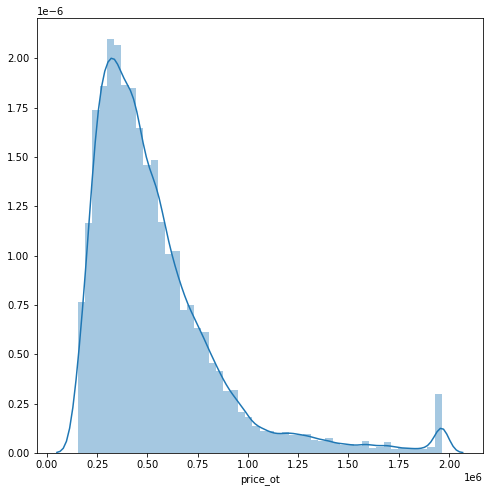

In [120]:
plt.figure(figsize= (8,8))
sns.distplot(df_train.price_ot)

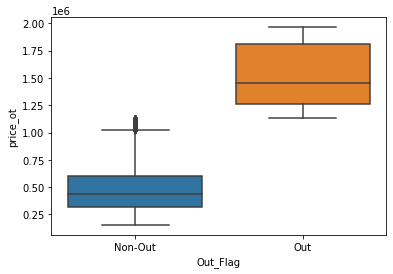

In [130]:
sns.boxplot(df_train.Out_Flag, df_train.price_ot, orient= 'v')